<a href="https://colab.research.google.com/github/msc-acse/acse-9-independent-research-project-OliverJBoom/blob/master/Chai_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linking to Github

In [2]:
from getpass import getpass
import os

user = "OliverJBoom"
password = getpass('github password')
os.environ['GITHUB_AUTH'] = user + ':' + password

!rm -rf Chai_Base
!git clone https://$GITHUB_AUTH@github.com/msc-acse/acse-9-independent-research-project-OliverJBoom.git Chai_Base

github password··········
Cloning into 'Chai_Base'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 13 (delta 2), reused 13 (delta 2), pack-reused 0
Unpacking objects: 100% (13/13), done.


## Linking to Google Drive

In [3]:
from google.colab import drive
drive.mount("/content/gdrive/")
path = "/content/gdrive/My Drive/Chai/Data"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


## Loading Packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

## Loading Data

In [0]:
cu_lme =  pd.read_csv("/content/gdrive/My Drive/Chai/Data/CuLME.csv", index_col='date', parse_dates=['date'], dayfirst=True).sort_index(ascending=True)
cu_shfe =  pd.read_csv("/content/gdrive/My Drive/Chai/Data/CuSHFE.csv", index_col='date', parse_dates=['date'], dayfirst=True).sort_index(ascending=True)
cu_com_s =  pd.read_csv("/content/gdrive/My Drive/Chai/Data/CuCOMS.csv", index_col='date', parse_dates=['date'], dayfirst=True).sort_index(ascending=True)
cu_com_p =  pd.read_csv("/content/gdrive/My Drive/Chai/Data/CuCOMP.csv", index_col='date', parse_dates=['date'], dayfirst=True).sort_index(ascending=True)

universe = [cu_lme, cu_shfe, cu_com_s, cu_com_p] 

In [0]:
def visualise_plots(universe, frequency="MS"):
  """Plotting the line graph for all of the 
  instruments being inspected"""
  for df in universe:
    df = df.resample(frequency).sum()
    df.asfreq(frequency).plot() 
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.grid()
    plt.show()
    
visualise_plots(universe)

In [20]:
print(universe)

[              value
date               
2006-08-29  7410.00
2006-08-30  7465.00
2006-08-31  7719.00
2006-09-01  7607.00
2006-09-04  7669.00
2006-09-05  7946.00
2006-09-06  8066.00
2006-09-07  8037.00
2006-09-08  7833.00
2006-09-11  7476.00
2006-09-12  7587.00
2006-09-13  7484.50
2006-09-14  7439.00
2006-09-15  7281.00
2006-09-18  7459.00
2006-09-19  7516.00
2006-09-20  7474.00
2006-09-21  7602.00
2006-09-22  7601.00
2006-09-25  7560.00
2006-09-26  7708.00
2006-09-27  7662.00
2006-09-28  7500.00
2006-09-29  7568.00
2006-10-02  7523.00
2006-10-03  7347.00
2006-10-04  7059.00
2006-10-05  7331.00
2006-10-06  7494.00
2006-10-09  7489.00
...             ...
2019-04-17  6537.00
2019-04-18  6460.75
2019-04-23  6394.25
2019-04-24  6444.75
2019-04-25  6358.50
2019-04-26  6398.75
2019-04-29  6402.50
2019-04-30  6426.75
2019-05-01  6225.25
2019-05-02  6166.00
2019-05-07  6168.75
2019-05-08  6129.75
2019-05-09  6089.00
2019-05-13  5986.50
2019-05-14  5997.00
2019-05-15  6053.75
2019-05-16  6071.00

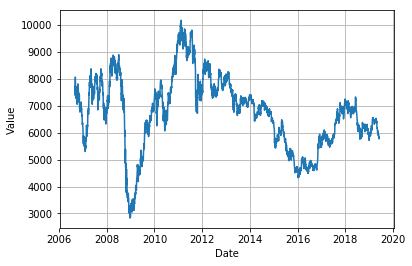

In [13]:
cu_lme.head()
plt.plot(cu_lme.index, cu_lme.value)
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid()
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3211 entries, 2006-08-29 to 2019-06-05
Data columns (total 1 columns):
value    3211 non-null float64
dtypes: float64(1)
memory usage: 50.2 KB


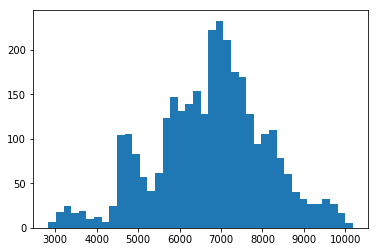

In [8]:
cu_lme.info()
plt.hist((cu_lme['value']), bins=40)
plt.show()

NameError: ignored

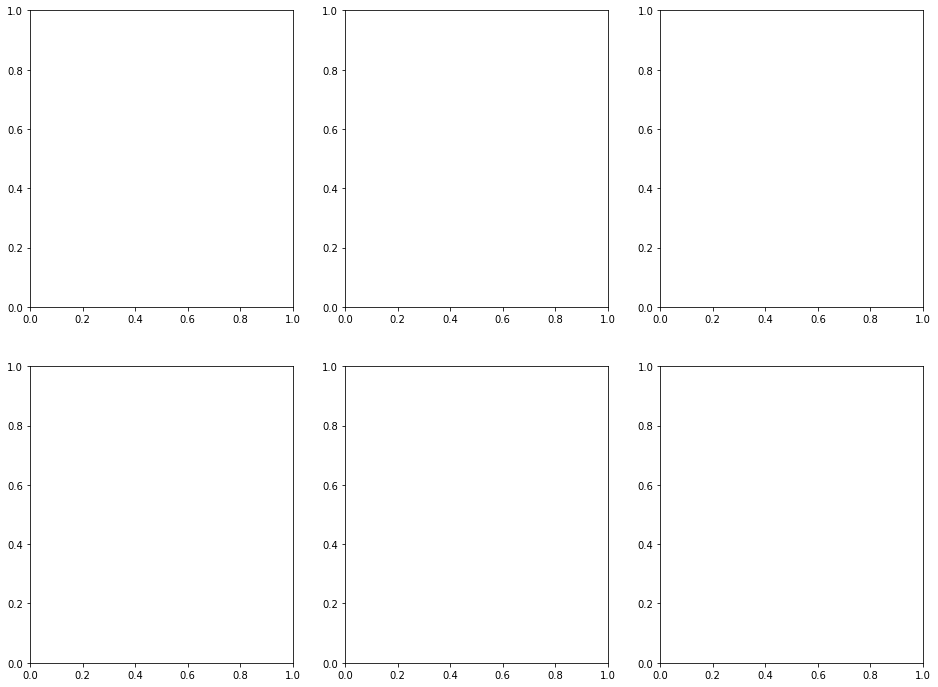

In [9]:
# Finding differencing component


fig, axes = plt.subplots(2, 3, figsize=(16, 12))
lag_num = 100


# Need to redo this code too similar to other code online https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
axes[0, 0].plot(df.value)
plot_acf(df.value, lags=lag_num, ax=axes[0, 1])
plot_pacf(df.value, lags=lag_num, ax=axes[0, 2])
axes[0, 0].set_title("Copper Price")
axes[0, 1].set_title("Autocorrelation")
axes[0, 2].set_title("Partial Correlation")

axes[1, 0].plot(df.value.diff())
plot_acf(df.value.diff().dropna(), lags=lag_num, ax=axes[1, 1])
plot_pacf(df.value.diff().dropna(), lags=lag_num, ax=axes[1, 2])
axes[1, 0].set_title("1st Order Difference")
axes[1, 1].set_title("Autocorrelation")
axes[1, 2].set_title("Partial Correlation")

# axes[2, 0].plot(df.value.diff().diff())
# plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])
# axes[2, 0].set_title("2nd Order Difference")
# axes[2, 1].set_title("Autocorrelation")

plt.show()

# Differencing d = 1 is this weak stationarity
# model = ARIMA(df.value, order=(1,1,2))

NameError: ignored

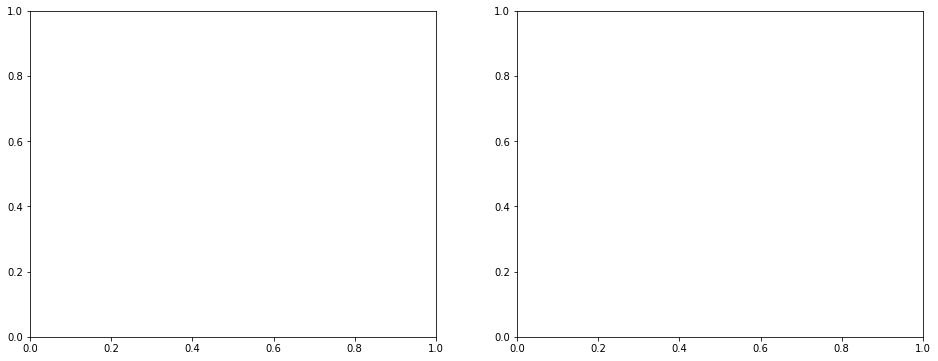

In [10]:
# Finding autoregressive component

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].plot(df.value.diff())
axes[0].set_title('1st Differencing')
plot_pacf(df.value.diff().dropna(), ax=axes[1], lags=50)
plt.plot()

# autoregressive term p = 1

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


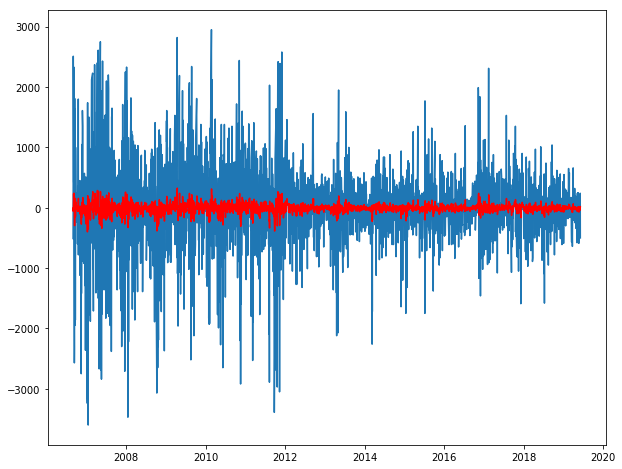

In [0]:
# Fitting the data

model = ARIMA(df.value, order=(1, 1, 1))
model_fit = model.fit(disp=False)

fig, axes = plt.subplots(1, 1, figsize=(10, 8))
axes.plot(df.value.diff())
axes.plot(model_fit.fittedvalues, color='red')
plt.show()

In [0]:
df.index.freq

In [0]:
from statsmodels.tsa.stattools import acf, pacf

In [0]:
vals_acf = acf(df.value.diff().dropna(), nlags=40)
vals_pacf = pacf(df.value.diff().dropna(), nlags=40)

In [0]:
def significance_cross(time_series, sig_val=0.05):
  """Returns the lag that crosses the significance threshold last"""
  
  sig_arr = np.where(time_series > sig_val)[0]
  n = 1
  
  while n < len(sig_arr) - 1:

    if n+1 != sig_arr[n+1]: return sig_arr[n]
    
    n += 1
    
  print("More differencing required")
  return None

print("Order of AR (p) Term:", significance_cross(acf(df.value.diff().dropna()), 0.05))
print("Order of MA (q) Term:", significance_cross(pacf(df.value.diff().dropna()), 0.05))

Order of AR (p) Term: 1
Order of MA (q) Term: 1


In [0]:
def stationarity_check(df, sig_val):
  """Check of stationarity using the augmented dickey fuller test
  and find the differening ordered required for stationarity"""
  adf_val = adfuller(df.value.dropna())
  stationarity = False
  d_val = 0
  
  while stationarity == False:
    
    if adf_val[1] > sig_val:
      print('Series is Non-Stationary\np-value: %.3f' % adf_val[1])
      stationarity_check(df.diff(), sig_val)
      d_val += 1
      break
      
    else:
      print('Series is Stationary\np-value: %.3f' % adf_val[1])
      stationarity = True
  
  return d_val

print("Order of Differencing (d) Term:", stationarity_check(df, 0.05))

Series is Non-Stationary
p-value: 0.105
Series is Stationary
p-value: 0.000
Order of Differencing (d) Term: 1


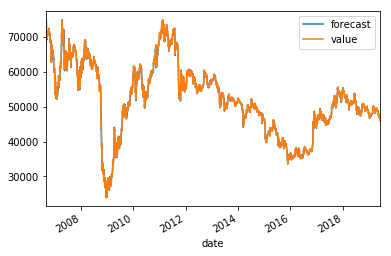

In [0]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [0]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                 3100
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -24573.695
Method:                       css-mle   S.D. of innovations            670.523
Date:                Thu, 13 Jun 2019   AIC                          49155.390
Time:                        16:26:50   BIC                          49179.547
Sample:                             1   HQIC                         49164.065
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -7.0955     13.849     -0.512      0.608     -34.238      20.047
ar.L1.D.value     0.3537      0.181      1.952      0.051      -0.002       0.709
ma.L1.D.value    -0.2568      0.188     

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


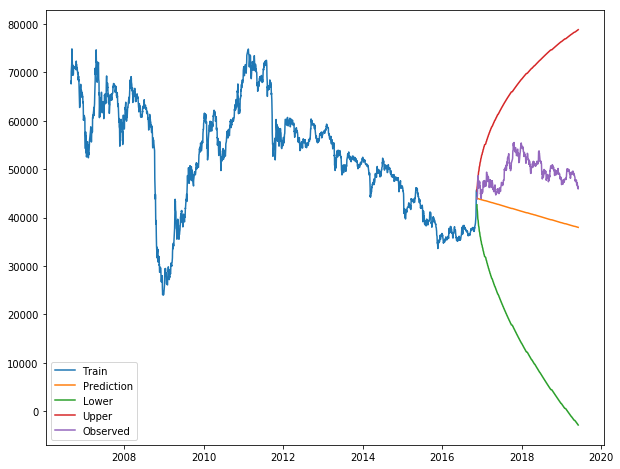

In [0]:
fig, axes = plt.subplots(1, 1, figsize=(10, 8))

model = ARIMA(train.value, order=(1, 1, 1))
model_fit = model.fit(disp=False)

tt_split = 0.8
train = df.iloc[:int(tt_split*len(df))]
test = df.iloc[int(tt_split*len(df)):]

confidence = 0.95
fc, se, conf = model_fit.forecast(len(test), alpha=1-confidence)
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)


axes.plot(train, label='Train')
axes.plot(fc_series, label='Prediction')
axes.plot(lower_series, label='Lower')
axes.plot(upper_series, label='Upper')
axes.plot(test, label='Observed')
axes.legend()
plt.show()